In [133]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pprint import pprint
from bs4 import BeautifulSoup
import requests
import re
from IPython.display import Image
nlp = en_core_web_sm.load()

In [19]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [20]:
def preprocess(text):
    text = word_tokenize(text)
    text = pos_tag(text)
    return text

In [21]:
text = preprocess(ex)
text

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

In [24]:
doc = nlp(ex)

In [46]:
print([f'{t.text} : {t.label_}' for t in doc.ents])

['European : NORP', 'Google : ORG', '$5.1 billion : MONEY', 'Wednesday : DATE']


In [54]:
def url_to_string(url):
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html,'html5lib')
    for script in soup(['script','side','aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+',soup.get_text()))

In [64]:
article = url_to_string('https://www.nytimes.com/2020/06/09/us/politics/trump-twitter.html')

In [65]:
article = nlp(article)

In [66]:
len(article.ents)

457

In [67]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'NORP': 38,
         'ORG': 47,
         'CARDINAL': 192,
         'PERSON': 72,
         'GPE': 41,
         'DATE': 26,
         'ORDINAL': 7,
         'MONEY': 11,
         'PERCENT': 4,
         'PRODUCT': 11,
         'TIME': 3,
         'QUANTITY': 1,
         'FAC': 2,
         'LOC': 1,
         'EVENT': 1})

In [136]:
displacy.render(nlp(str(sentences[-11])), style='ent')

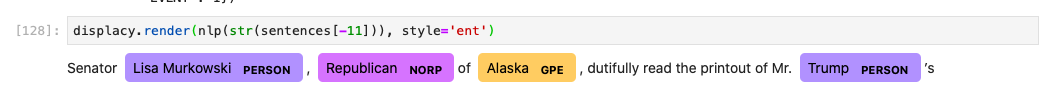

In [132]:
#Since Github won't display the proper render of displacy , inserting screenshot here
Image(filename='images/demo1.png')

In [95]:
displacy.render(nlp(str(sentences[-11])),jupyter=True,style='dep',options = {'distance' : 120})

In [96]:
[(x.orth_,x.pos_,x.lemma_) for x in [y for y in nlp(str(sentences[-11])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('Senator', 'PROPN', 'Senator'),
 ('Lisa', 'PROPN', 'Lisa'),
 ('Murkowski', 'PROPN', 'Murkowski'),
 ('Republican', 'PROPN', 'Republican'),
 ('Alaska', 'PROPN', 'Alaska'),
 ('dutifully', 'ADV', 'dutifully'),
 ('read', 'VERB', 'read'),
 ('printout', 'NOUN', 'printout'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Trump', 'PROPN', 'Trump')]

In [97]:
dict([(str(x),x.label_) for x in nlp(str(sentences[-11])).ents ])

{'Lisa Murkowski': 'PERSON',
 'Republican': 'NORP',
 'Alaska': 'GPE',
 'Trump': 'PERSON'}

In [134]:
s = ' '.join([str(x) for x in sentences[-59:]])

In [135]:
displacy.render(nlp(s),jupyter=True,style='ent')

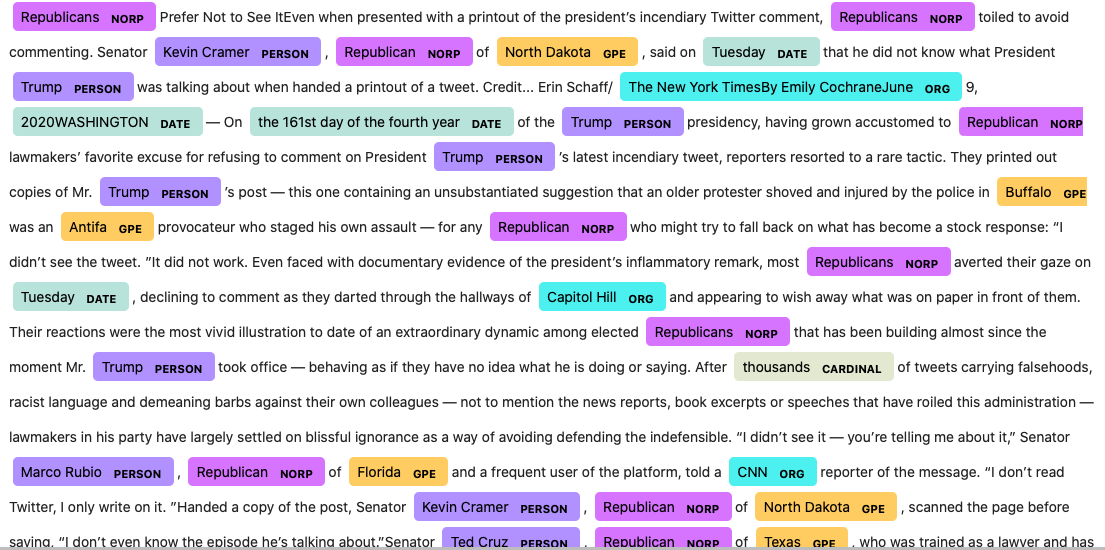

In [138]:
Image(filename='images/demo2.png')

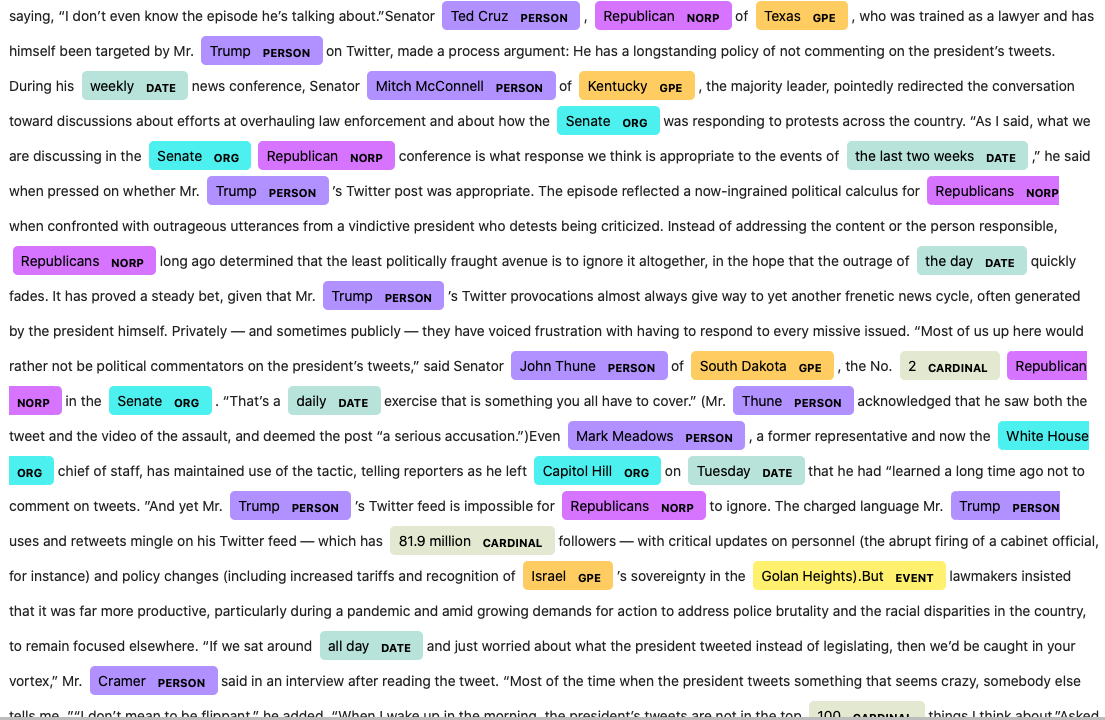

In [139]:
Image(filename='images/demo3.png')

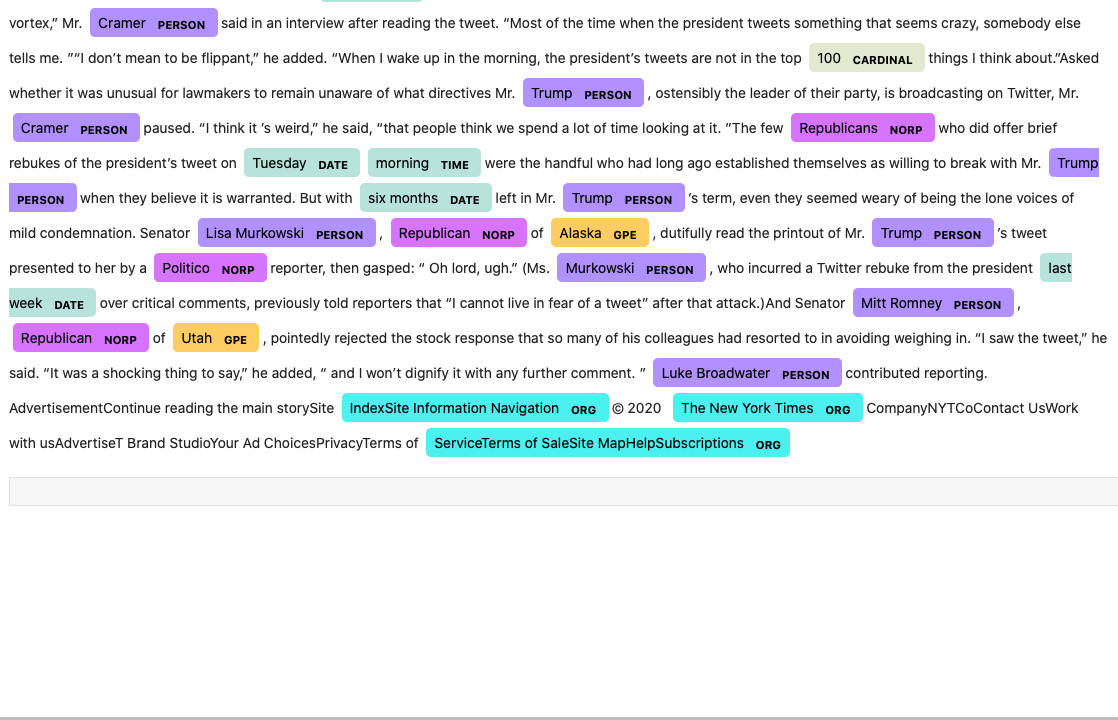

In [140]:
Image(filename='images/demo4.png')